In [2]:
import pandas as pd
import re
import copy
import numpy as np
import matplotlib.pyplot as plt

In [6]:
homePredicted = pd.read_csv('CSV\homePredict.csv')
awayPredicted = pd.read_csv('CSV\AwayPredict.csv')

In [17]:
homePredicted = homePredicted.drop('Unnamed: 0', axis=1)

In [18]:
awayPredicted = awayPredicted.drop('Unnamed: 0', axis=1)

In [25]:
SumTotalHome = homePredicted.sum(axis=0)
SumTotalAway = awayPredicted.sum(axis=0)

In [26]:
SumHomeDF = pd.DataFrame(SumTotalHome)
SumAwayDF = pd.DataFrame(SumTotalAway)

In [36]:
MergedSum = SumHomeDF.merge(SumAwayDF, left_index=True, right_index=True, how='inner')
MergedSum.rename(columns={"0_x": "Away", "0_y":"Home"}, inplace=True)

In [37]:
MergedSum

,Away,Home
Away-Away,327748,114130
Away-Equal,37925,37457
Away-Home,116455,330541
Equal-Away,553792,214615
Equal-Equal,120794,118949
Equal-Home,339254,680276
Home-Away,439495,108557
Home-Equal,49843,49256
Home-Home,225454,556979


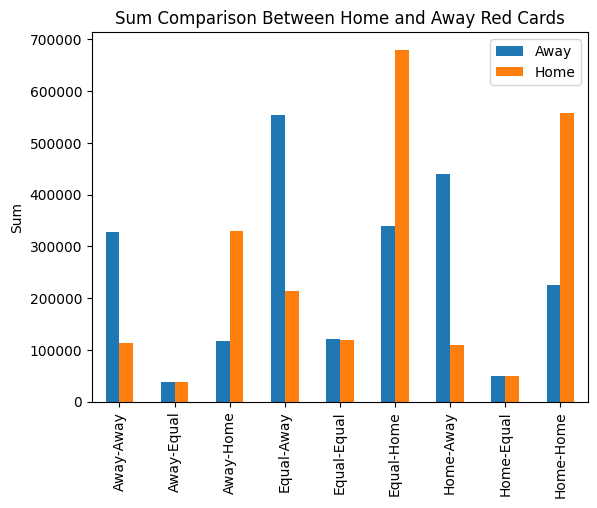

In [47]:
from matplotlib import pyplot as plt
plt.style.use('default')
MergedSum.plot(kind="bar", title="SUM")
plt.title("Sum Comparison Between Home and Away Red Cards")
plt.ylabel("Sum")
plt.savefig('sumComparison.png')

In [59]:
minute_plot = pd.read_csv('CSV\minute_all.csv')

In [60]:
minute_plot = minute_plot.drop(['Unnamed: 0','Minute', 'Yellow Home', 'Yellow Away', 'Own Goal Home', 'Own Goal Away'], axis=1)

In [61]:
minute_plot

,Goal Home,Goal Away,Red Card Home,Red Card Away
0,269,166,2,2
1,396,330,5,6
2,445,353,5,8
3,478,343,2,13
4,499,360,6,13
...,...,...,...,...
85,628,450,79,106
86,667,538,75,103
87,669,487,78,107
88,657,509,100,106


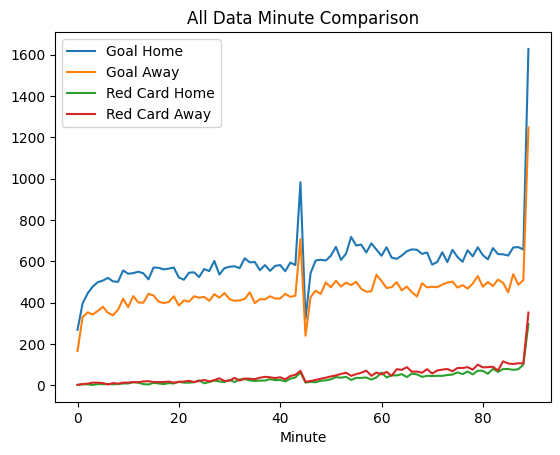

In [63]:
minute_plot.plot(kind="line", title="Data Spikes")
plt.title("All Data Minute Comparison")
plt.xlabel("Minute")
plt.savefig('minuteComparison.png')

In [64]:
homePredicted_show = pd.read_csv('CSV\homePredict.csv')
awayPredicted_show = pd.read_csv('CSV\AwayPredict.csv')

In [71]:
awayPredicted_show

,Unnamed: 0,Away-Away,Away-Equal,Away-Home,Equal-Away,Equal-Equal,Equal-Home,Home-Away,Home-Equal,Home-Home
0,0,55,0,6771,18,0,6662,25,0,11033
1,1,159,2,6666,73,0,6637,83,2,10942
2,2,209,3,6607,125,2,6600,187,4,10827
3,3,272,11,6564,168,2,6539,268,9,10731
4,4,355,14,6482,205,8,6511,356,15,10618
...,...,...,...,...,...,...,...,...,...,...
85,85,482,210,505,5927,3579,12280,333,215,1033
86,86,408,174,360,6123,3684,12600,241,160,814
87,87,314,114,196,6343,3802,12982,136,115,562
88,88,207,58,63,6574,3919,13355,45,49,294


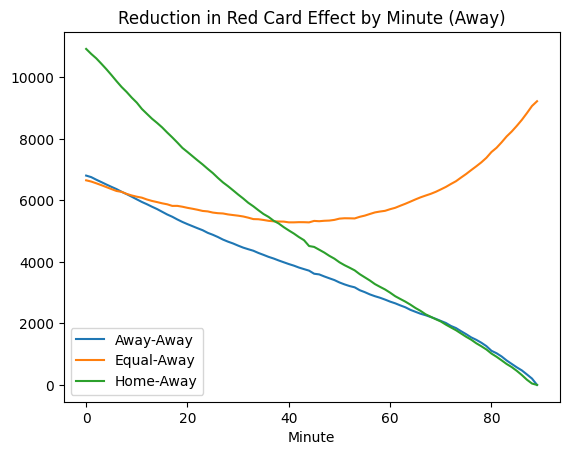

In [69]:
homePredicted_show[['Away-Away', 'Equal-Away', 'Home-Away']].plot(kind="line", title="Data Comparison")
plt.title("Reduction in Red Card Effect by Minute (Away)")
plt.xlabel("Minute")
plt.savefig('reduceEffectAway.png')

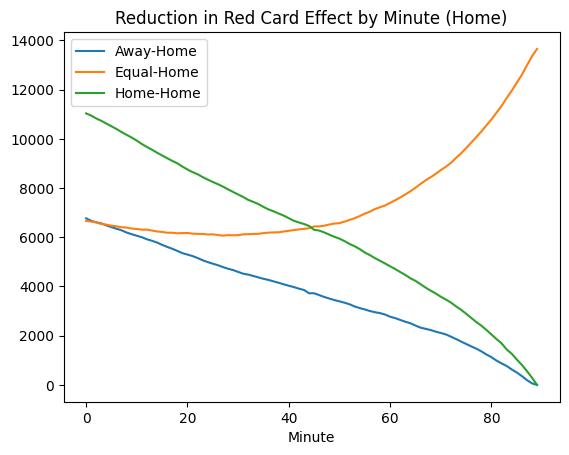

In [70]:
awayPredicted_show[['Away-Home', 'Equal-Home', 'Home-Home']].plot(kind="line", title="Data Comparison")
plt.title("Reduction in Red Card Effect by Minute (Home)")
plt.xlabel("Minute")
plt.savefig('reduceEffectHome.png')